In [1]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt
import os

from helper import *

In [2]:
contact_range_lst = []
dist_lst = []
delta = []
for filename in os.listdir("range_log"):
    if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
        continue
    with open("range_log/"+filename, 'r') as f:
        dic = json.load(f)
    obj_set = set()
    obj_set.add(0)
    obj_set.add(1)
    obj_set.add(2)
    
    first_contact = dic['first contact object']
    obj_set.remove(first_contact)
    obj_lst = list(obj_set)
    first_contact_vertices = np.array(dic[str(first_contact)+' vertices']) + np.array(dic[str(first_contact)+' original pos'])
    contact_range, range_pt_lst = find_max_contact_range(first_contact_vertices, dic['start pt'], dic['end pt'])
#     if contact_range == 0:
#         print(range_pt_lst)
    
    contact_range_lst.append(contact_range)
    
    dist_lst.append(euclidean_dist(dic[str(obj_lst[0])+' original pos'], dic[str(obj_lst[1])+' original pos']))
    
    delta.append(dic['mean separation after push'] - dic['mean separation before push'])


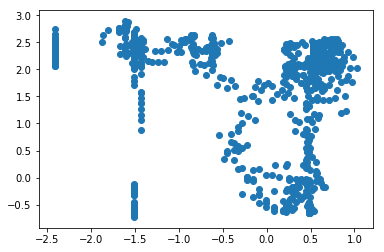

In [3]:
plt.scatter(np.array(contact_range_lst) - np.array(dist_lst), delta)

In [4]:
contact_range_lst = []
dist_lst = []
delta = []
for filename in os.listdir("range_log"):
    if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
        continue
    with open("range_log/"+filename, 'r') as f:
        dic = json.load(f)
    obj_set = set()
    obj_set.add(0)
    obj_set.add(1)
    obj_set.add(2)
    
    first_contact = dic['first contact object']
    obj_set.remove(first_contact)
    obj_lst = list(obj_set)
    first_contact_vertices = np.array(dic[str(first_contact)+' vertices']) + np.array(dic[str(first_contact)+' original pos'])
    contact_range, range_pt_lst = find_max_contact_range(first_contact_vertices, dic['start pt'], dic['end pt'])
    if contact_range != 0:
        contact_range_lst.append(contact_range)
    
        dist_lst.append(euclidean_dist(dic[str(obj_lst[0])+' original pos'], dic[str(obj_lst[1])+' original pos']))
    
        delta.append(dic['mean separation after push'] - dic['mean separation before push'])
    



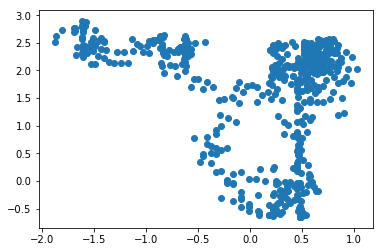

In [5]:
plt.scatter(np.array(contact_range_lst) - np.array(dist_lst), delta)

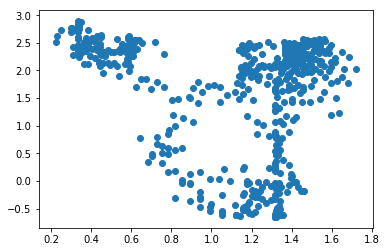

In [6]:
plt.scatter((np.array(contact_range_lst))/np.array(dist_lst), delta)

(array([16., 19., 10., 10., 12.,  9., 16.,  7.,  7.,  7.,  5.,  5.,  6.,
         6.,  4.,  8.,  1.,  7.,  7.,  3.,  4., 12.,  7., 19., 15., 18.,
        21., 27., 43., 48., 77., 91., 30., 10., 10.,  7.]),
 array([-7.00000000e-01, -6.00000000e-01, -5.00000000e-01, -4.00000000e-01,
        -3.00000000e-01, -2.00000000e-01, -1.00000000e-01, -1.11022302e-16,
         1.00000000e-01,  2.00000000e-01,  3.00000000e-01,  4.00000000e-01,
         5.00000000e-01,  6.00000000e-01,  7.00000000e-01,  8.00000000e-01,
         9.00000000e-01,  1.00000000e+00,  1.10000000e+00,  1.20000000e+00,
         1.30000000e+00,  1.40000000e+00,  1.50000000e+00,  1.60000000e+00,
         1.70000000e+00,  1.80000000e+00,  1.90000000e+00,  2.00000000e+00,
         2.10000000e+00,  2.20000000e+00,  2.30000000e+00,  2.40000000e+00,
         2.50000000e+00,  2.60000000e+00,  2.70000000e+00,  2.80000000e+00,
         2.90000000e+00]),
 <a list of 36 Patch objects>)

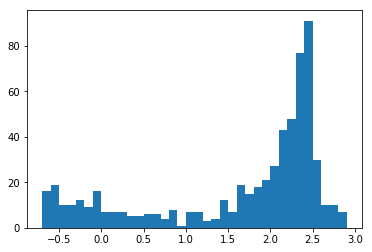

In [7]:
plt.hist(delta, bins=np.arange(-0.7, 3.0, 0.1))

In [8]:
bin_ratio = [[], [], [], [], [], [], [], []]
delta_lst = [[], [], [], [], [], [], [], []]

lst_ratio = (np.array(contact_range_lst))/np.array(dist_lst)
for j in range(len(delta)):
    bin_num = int((lst_ratio[j] - 0.2) // 0.2)
    bin_ratio[bin_num].append(lst_ratio[j])
    delta_lst[bin_num].append(delta[j])

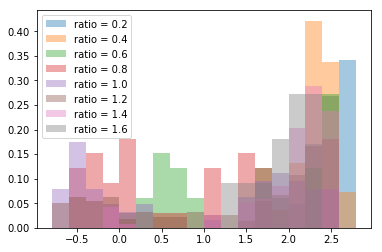

In [9]:
for i in range(len(delta_lst)):
    weights = np.ones_like(delta_lst[i])/float(len(delta_lst[i]))
    plt.hist(delta_lst[i], weights=weights, bins=np.arange(-0.8, 3, 0.2), alpha=0.4, label="ratio = "+str(round(i * 0.2 + 0.2, 1)))
    plt.legend(loc='upper left')

In [19]:
obj_dist_lst = []
obj_contact_lst = []
change_pos = []
for filename in os.listdir("range_log"):
    if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
        continue
    with open("range_log/"+filename, 'r') as f:
        dic = json.load(f)
    
    first_contact = dic['first contact object']
    first_contact_vertices = np.array(dic[str(first_contact)+' vertices']) + np.array(dic[str(first_contact)+' original pos'])
    contact_range, range_pt_lst = find_max_contact_range(first_contact_vertices, dic['start pt'], dic['end pt'])
    range_pt_side = [side_of_point_on_line(dic['start pt'], dic['end pt'], pt) for pt in range_pt_lst]
    if contact_range != 0:
        first_contact_dist = dic[str(first_contact)+" project dist"]
        for i in range(3):
            if dic[str(i)+" project dist"] > first_contact_dist and i != first_contact:
                
                side_com = side_of_point_on_line(dic['start pt'], dic['end pt'], dic[str(i)+" original pos"])
                for j in range(len(range_pt_lst)):
                    if range_pt_side[j] == side_com:
                        obj_dist_lst.append(dic[str(j)+" dist to pushing line"])
                        obj_contact_lst.append(pointToLineDistance(dic['start pt'], dic['end pt'], range_pt_lst[j]))
                        change_pos.append(dic[str(i)+" change of pos"])
                        




(array([289.,  83.,  43.,  33.,  12.,  12.,   5.,   4.,   7.,   5.,   4.,
          5.,   5.,  12.,  11.,  11.,  16.,  11.,  14.,  10.,  17.,  17.,
         13.,  22.,  16.,  23.,  23.,  15.,  27.,  22.,  17.,  19.,  24.,
         19.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
        5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8]),
 <a list of 34 Patch objects>)

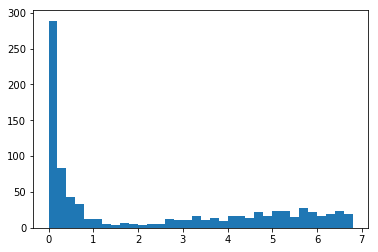

In [23]:
plt.hist(change_pos, bins=np.arange(0.0, 7, 0.2))

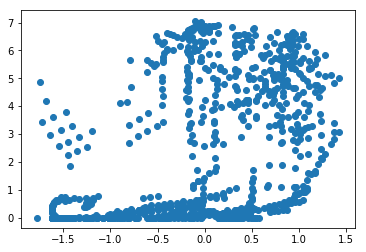

In [25]:
plt.scatter(np.array(obj_contact_lst)-np.array(obj_dist_lst), change_pos)

In [26]:
bin_diff_lst = [[], [], [], [], [], [], []]
position_change_lst = [[], [], [], [], [], [], []]

lst_diff = np.array(obj_contact_lst)-np.array(obj_dist_lst)
for j in range(len(change_pos)):
    bin_num = int((lst_diff[j] + 2) // 0.5)
    bin_diff_lst[bin_num].append(lst_diff[j])
    position_change_lst[bin_num].append(change_pos[j])

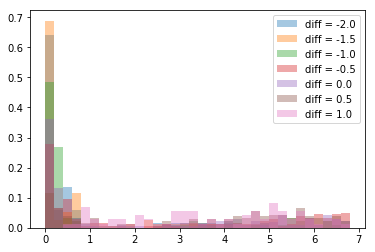

In [31]:
for i in range(len(position_change_lst)):
    weights = np.ones_like(position_change_lst[i])/float(len(position_change_lst[i]))
    plt.hist(position_change_lst[i], weights=weights, bins=np.arange(0.0, 7, 0.2), alpha=0.4, label="diff = "+str(round(i * 0.5 - 2, 1)))
    plt.legend(loc='upper right')

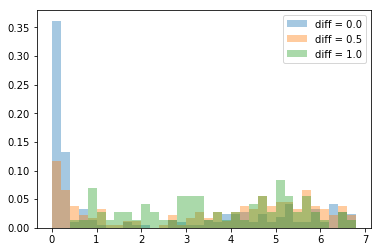

In [33]:
for i in range(4, len(position_change_lst)):
    weights = np.ones_like(position_change_lst[i])/float(len(position_change_lst[i]))
    plt.hist(position_change_lst[i], weights=weights, bins=np.arange(0.0, 7, 0.2), alpha=0.4, label="diff = "+str(round(i * 0.5 - 2, 1)))
    plt.legend(loc='upper right')

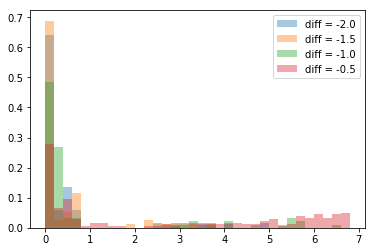

In [34]:
for i in range(0, 4):
    weights = np.ones_like(position_change_lst[i])/float(len(position_change_lst[i]))
    plt.hist(position_change_lst[i], weights=weights, bins=np.arange(0.0, 7, 0.2), alpha=0.4, label="diff = "+str(round(i * 0.5 - 2, 1)))
    plt.legend(loc='upper right')

In [35]:
change_pos_sum = []
delta = []
for filename in os.listdir("range_log"):
    if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
        continue
    with open("range_log/"+filename, 'r') as f:
        dic = json.load(f)
    obj_set = set()
    obj_set.add(0)
    obj_set.add(1)
    obj_set.add(2)
    
    first_contact = dic['first contact object']
    obj_set.remove(first_contact)
    obj_lst = list(obj_set)
    
    s = 0
    
    for obj in obj_lst:
        s += (dic[str(obj)+" change of pos"])
    change_pos_sum.append(s)
    
    delta.append(dic['mean separation after push'] - dic['mean separation before push'])

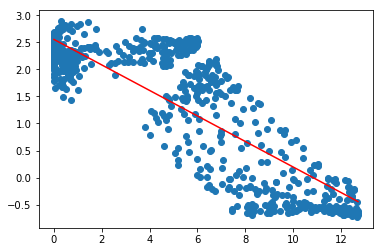

In [38]:
plt.scatter(change_pos_sum, delta)
plt.plot(np.unique(change_pos_sum), np.poly1d(np.polyfit(change_pos_sum, delta, 1))(np.unique(change_pos_sum)), 'r')